In [2]:
from helpers import *
import matplotlib.pyplot as plt

data = get_data("data/eurpln.txt")
analyzed_data = data[(data['DATE'] >= '2020-01-01') & (data['DATE'] < '2022-09-27')]

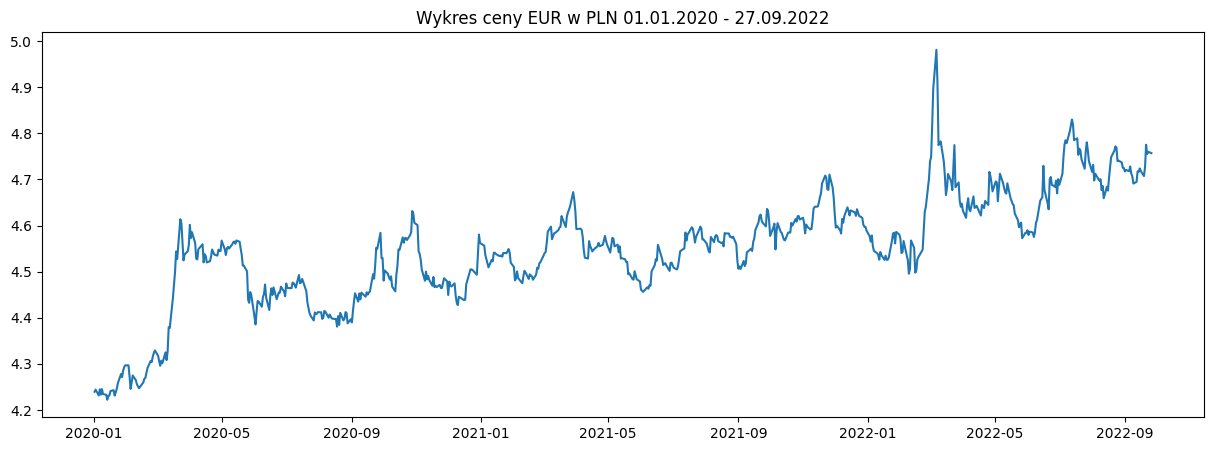

In [3]:
plt.figure(figsize=(15,5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["VALUE"].values)
plt.title("Wykres ceny EUR w PLN 01.01.2020 - 27.09.2022")
plt.show()

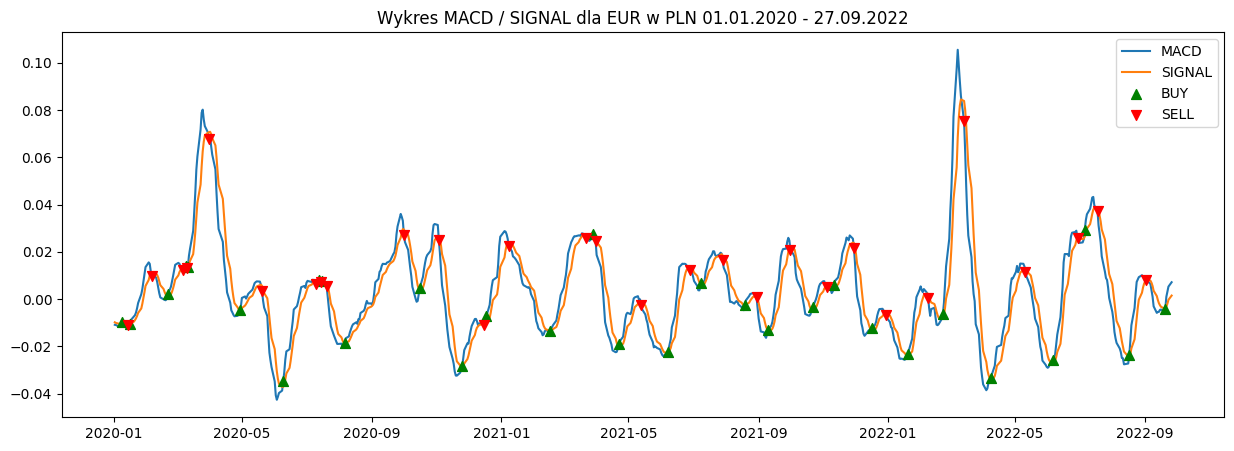

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["MACD"].values)
plt.plot(analyzed_data["DATE"].values, analyzed_data["SIGNAL"].values)
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'BUY']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'BUY']["MACD"].values, color='green', marker='^', s=50, zorder=15, label='BUY')
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'SELL']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'SELL']["MACD"].values, color='red', marker='v', s=50, zorder=15, label='SELL')
plt.legend(['MACD', 'SIGNAL', 'BUY', 'SELL'])
plt.title("Wykres MACD / SIGNAL dla EUR w PLN 01.01.2020 - 27.09.2022")
plt.show()

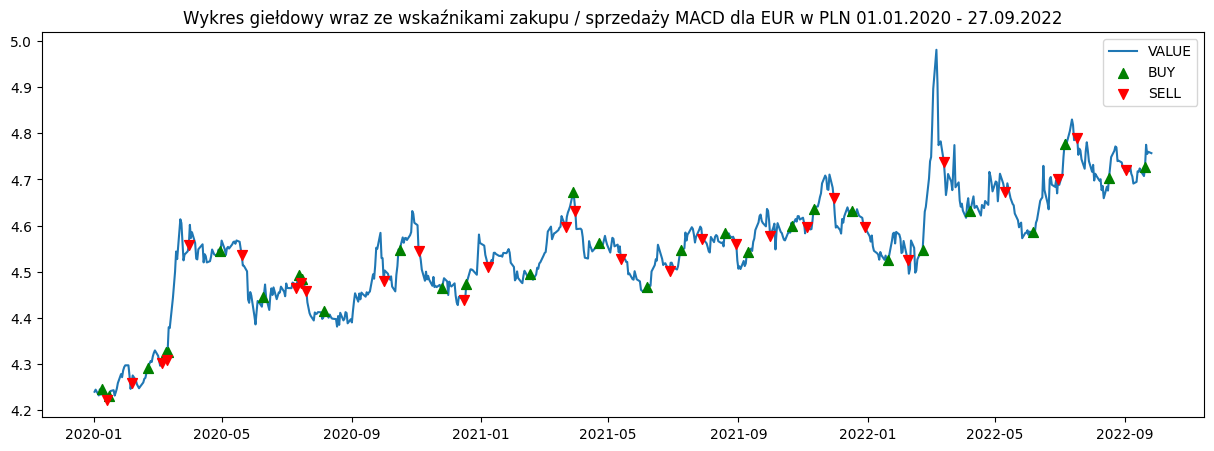

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(analyzed_data["DATE"].values, analyzed_data["VALUE"].values)
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'BUY']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'BUY']["VALUE"].values, color='green', marker='^', s=50, zorder=15, label='BUY')
plt.scatter(analyzed_data[analyzed_data["ACTION"] == 'SELL']["DATE"].values, analyzed_data[analyzed_data["ACTION"] == 'SELL']["VALUE"].values, color='red', marker='v', s=50, zorder=15, label='SELL')
plt.legend(['VALUE', 'BUY', 'SELL'])
plt.title("Wykres giełdowy wraz ze wskaźnikami zakupu / sprzedaży MACD dla EUR w PLN 01.01.2020 - 27.09.2022")
plt.show()

In [6]:
print("Dla początkowych 1000 jednostek kapitału zysk wynosi: {} PLN".format(simulate(analyzed_data, 1000).round(2)))

Dla początkowych 1000 jednostek kapitału zysk wynosi: 774.62 PLN


In [12]:
#get_sells_and_their_profit(analyzed_data, 1000).to_csv("raport/eurpln-sells.csv", index=False)
get_sells_and_their_profit(analyzed_data, 1000)

c:\Users\KanarekLife\Projects\NumericalMethods\Project01\helpers.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([[row.DATE, last_bought_for, row.VALUE, round(diff, 2)]], columns=['DATE', 'LAST_BOUGHT_FOR', 'SELL_VALUE', 'PROFIT'])], ignore_index=True)


In [8]:
def temp(data: pd.DataFrame, stocks: int) -> float:
    """
    Simulates a trading strategy and calculates the profit or loss.

    Args:
        data (pd.DataFrame): The data frame containing the preprocessed data.
        stocks (int): The number of stocks to trade with.

    Returns:
        float: The profit or loss from the trading strategy.
    """
    would_be_money = data.iloc[0, 1] * stocks
    money = 0
    none_strike = 0
    for row in data.itertuples():
        if row.ACTION == 'BUY' and none_strike >= 2:
            none_strike = 0
            if money > 0:
                stocks = money // row.VALUE
                money -= stocks * row.VALUE
        elif row.ACTION == 'SELL':
            none_strike = 0
            if stocks > 0:
                money += stocks * row.VALUE
                stocks = 0
        elif row.ACTION == 'NONE':
            none_strike += 1
    if stocks > 0:
        money = stocks * row.VALUE
        stocks = 0
    return money - would_be_money

normal_profit = 0
tweaked_profit = 0
for i in range(2000, 2022):
    default = simulate(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
    tweaked = temp(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
    normal_profit += default
    tweaked_profit += tweaked
    has_improved = tweaked >= default
    print("[{}] Improved: {} Default: {} Tweak: {} Diff: {}".format(i, has_improved, default, tweaked, tweaked - default))
print("Default profit: {} Tweak profit: {}".format(normal_profit, tweaked_profit))

[2000] Improved: True Default: -850.5 Tweak: -582.25 Diff: 268.25
[2001] Improved: True Default: -160.0 Tweak: 193.03 Diff: 353.03
[2002] Improved: True Default: 158.11 Tweak: 370.98 Diff: 212.87
[2003] Improved: False Default: -271.23 Tweak: -333.76 Diff: -62.52999999999997
[2004] Improved: False Default: -407.27 Tweak: -515.61 Diff: -108.34000000000003
[2005] Improved: False Default: -96.91 Tweak: -236.8 Diff: -139.89000000000001
[2006] Improved: False Default: -161.8 Tweak: -166.02 Diff: -4.219999999999999
[2007] Improved: False Default: 15.43 Tweak: -110.69 Diff: -126.12
[2008] Improved: False Default: -313.42 Tweak: -384.52 Diff: -71.09999999999997
[2009] Improved: True Default: -413.44 Tweak: -271.6 Diff: 141.83999999999997
[2010] Improved: True Default: -379.23 Tweak: -209.16 Diff: 170.07000000000002
[2011] Improved: True Default: -20.76 Tweak: 46.84 Diff: 67.60000000000001
[2012] Improved: True Default: -178.33 Tweak: -137.89 Diff: 40.440000000000026
[2013] Improved: True Defau

In [9]:
import pandas as pd
results_df = pd.DataFrame(columns=['x', 'improved', 'worse', 'all'])

for x in range(0, 10):
    stats = 0
    worse_stats = 0
    all_stats = 0
    for i in range(2000, 2021):
        default = simulate(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
        tweaked = simulate_with_x_day_buy_delay(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000, x).round(2)
        if tweaked > default:
            stats += 1
        if tweaked < default:
            worse_stats += 1
        all_stats += 1
    results_df = pd.concat([results_df, pd.DataFrame({'x': [x], 'improved': [stats], 'worse': [worse_stats], 'all': [all_stats]})], ignore_index=True)

results_df.rename(columns={'x': 'Liczba dni opóźnienia zakupu', 'improved': 'Liczba lepszych wyników', 'worse': 'Liczba gorszych wyników', 'all': 'Liczba wszystkich wyników'}, inplace=True)
#results_df.to_csv("raport/x_parameter_eurpln.csv", index=False)
results_df

,Liczba dni opóźnienia zakupu,Liczba lepszych wyników,Liczba gorszych wyników,Liczba wszystkich wyników
0,0,0,0,21
1,1,15,6,21
2,2,12,9,21
3,3,14,7,21
4,4,13,8,21
5,5,10,11,21
6,6,12,9,21
7,7,11,10,21
8,8,13,8,21
9,9,11,10,21


In [11]:
import pandas as pd
results = pd.DataFrame(columns=['Year', 'Improved', 'Default', 'Tweak', 'Diff'])

for i in range(2000, 2022):
    default = simulate(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000).round(2)
    tweaked = simulate_with_x_day_buy_delay(data[(data['DATE'] >= '{}-01-01'.format(i)) & (data['DATE'] < '{}-09-27'.format(i + 2))], 1000, 2).round(2)
    has_improved = tweaked >= default
    diff = tweaked - default
    results = pd.concat([results, pd.DataFrame({'Year': [i], 'Improved': [has_improved], 'Default': [default], 'Tweak': [tweaked], 'Diff': [round(diff, 2)]})], ignore_index=True)

results = results.rename(columns={'Year': 'Rok', 'Improved': 'Czy poprawiło się', 'Default': 'Wynik algorytmu prostego', 'Tweak': 'Wynik algorytmu z usuwaniem szumów 2 dniowym', 'Diff': 'Różnica'})
#results.to_csv('raport/eurpln_improved.csv', index=False)
results

C:\Users\KanarekLife\AppData\Local\Temp\ipykernel_271856\785042051.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Year': [i], 'Improved': [has_improved], 'Default': [default], 'Tweak': [tweaked], 'Diff': [round(diff, 2)]})], ignore_index=True)
